In [1]:
import matplotlib.pyplot as plt
import numpy as np

import skimage.io
import skimage.morphology

from collections import Counter
import re

import nltk
from nltk.corpus import stopwords

# QUIZ
### Working with Images and Text

### QUIZ 1
**Image Size
This delicious hamburger image is a standard RGB image. How much memory (in bytes) will this image take? You can either compute the answer or read the image and see how much space it takes.

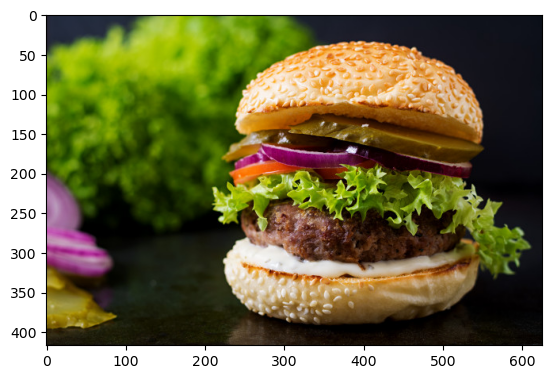

In [2]:
hamburguer = plt.imread("data/hamburguer.jpg")
plt.imshow(hamburguer)

In [3]:
print(f"The hamburguer images takes {hamburguer.nbytes} bytes.")

The hamburguer images takes 783126 bytes.


### QUIZ 3
**Dominant Channel**

An indication of the dominant color of the image can be the dominant channel, i.e. the channel (R, G, or B) with the greatest average brightness (intensity). What is the mean brightness of the dominant channel in the hamburger image? Round your answer to two decimal places.

In [4]:
red_channel, green_channel, blue_channel = hamburguer[:,:,0], hamburguer[:,:,1], hamburguer[:,:,2]

In [5]:
print(f"Red channel mean brightness: {round(red_channel.mean(), 2)}")
print(f"Green channel mean brightness: {round(green_channel.mean(), 2)}")
print(f"Blue channel mean brightness: {round(blue_channel.mean(), 2)}")

Red channel mean brightness: 90.09
Green channel mean brightness: 84.07
Blue channel mean brightness: 36.79


### QUIZ 4
**Morphology**

Read the blue channel of the hamburger image. Perform binary opening on this channel using a 3x3 square as the structuring element. How many white pixels does the resulting image contain?

In [6]:
blue_channel

array([[50, 51, 53, ..., 23, 22, 22],
       [50, 52, 53, ..., 24, 22, 22],
       [51, 52, 53, ..., 24, 21, 21],
       ...,
       [20, 25, 29, ...,  4,  6,  5],
       [ 7, 12, 19, ..., 12,  9,  8],
       [14, 18, 17, ..., 24, 23, 24]], dtype=uint8)

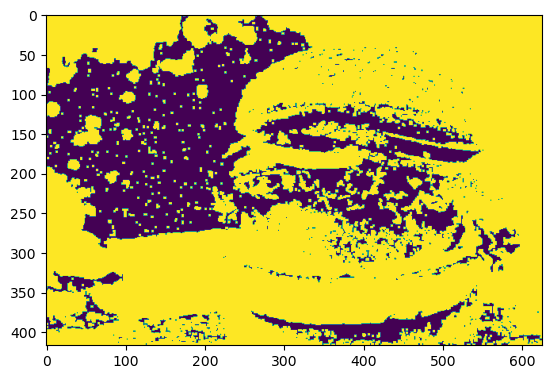

In [7]:
# structuring_element = np.ones((3, 3)) # first variant
structuring_element = skimage.morphology.square(3)
binary_image = skimage.morphology.binary_opening(blue_channel, structuring_element)
binary_image = binary_image.astype(int)
plt.imshow(binary_image)
plt.show()

In [8]:
def counter_white_pixels(binary_image):
    rows, columns = binary_image.shape
    counter = 0
    
    for row in range(rows):
        for value in binary_image[row]:
            if value == 1:
                counter += 1
    return counter

In [9]:
result = counter_white_pixels(binary_image)
print(f"White pixels in the binary image are {result}")

White pixels in the binary image are 182990


### Quiz 5
**Text Processing**
When we process text data, we must always remove all numbers, all punctuation and all non-Unicode characters, in order to make our work easier.

**FALSE**

While removing numbers, punctuation, and non-Unicode characters is a common preprocessing step in text data processing, it is not always necessary or desirable in every scenario. The preprocessing steps required for text data can vary depending on the specific task, the nature of the text, and the requirements of the analysis.

For instance, in certain text analysis tasks, such as sentiment analysis or topic modeling, numbers and punctuation can carry important information and removing them may result in the loss of valuable context. 


### QUIZ 6
**Pride and Prejudice, Part 1**

The most popular text in Project Gutenberg is the book "Pride and Prejudice" by Jane Austen, located at http://www.gutenberg.org/files/1342/1342-0.txt. Split by non-word characters to get all words. How many times does the word "pride" occur in the entire Web page? Don't forget to account for different casing.


In [10]:
with open("data/gutenberg.txt", "r", encoding = "utf-8", errors = "ignore") as f:
    text = f.read()
print(len(text))

748079


In [11]:
text

'\ufeffThe Project Gutenberg eBook of Pride and prejudice, by Jane Austen\n\nThis eBook is for the use of anyone anywhere in the United States and\nmost other parts of the world at no cost and with almost no restrictions\nwhatsoever. You may copy it, give it away or re-use it under the terms\nof the Project Gutenberg License included with this eBook or online at\nwww.gutenberg.org. If you are not located in the United States, you\nwill have to check the laws of the country where you are located before\nusing this eBook.\n\nTitle: Pride and prejudice\n\nAuthor: Jane Austen\n\nRelease Date: November 12, 2022 [eBook #1342]\n[Most recently updated: April 14, 2023]\n\nLanguage: English\n\nProduced by: Chuck Greif and the Online Distributed Proofreading Team at\n             http://www.pgdp.net (This file was produced from images\n             available at The Internet Archive)\n\n*** START OF THE PROJECT GUTENBERG EBOOK PRIDE AND PREJUDICE ***\n\n\n\n\n\n                            [Illustr

Now, let´s make all the text lowercase and make a word counter. 

In [12]:
text = text.lower()

In [13]:
#from collections import Counter
#import re
words = re.split("\W+", text)
word_counter = Counter(words)

In [14]:
pride_counter = word_counter["pride"]
print(f'The word "pride" appears {pride_counter} times in the text.')

The word "pride" appears 59 times in the text.


### QUIZ 7
**Pride and Prejudice, Part 2**

How many times does the word "prejudice" occur in the entire Web page?

In [15]:
prejudice_counter = word_counter["prejudice"]
print(f'The word "prejudice" appears {prejudice_counter} times in the text.')

The word "prejudice" appears 15 times in the text.


### QUIZ 8
**Protagonist**

Remove all stopwords. Once again, count all remaining words. What's the name of the protagonist (main character) in the book?

In [16]:
#import nltk
#from nltk.corpus import stopwords
stop = set(stopwords.words("english"))

# get all words that are not in stopwords
words_without_stop = [word for word in words if word not in stop]  

In [17]:
words_without_stop

['',
 'project',
 'gutenberg',
 'ebook',
 'pride',
 'prejudice',
 'jane',
 'austen',
 'ebook',
 'use',
 'anyone',
 'anywhere',
 'united',
 'states',
 'parts',
 'world',
 'cost',
 'almost',
 'restrictions',
 'whatsoever',
 'may',
 'copy',
 'give',
 'away',
 'use',
 'terms',
 'project',
 'gutenberg',
 'license',
 'included',
 'ebook',
 'online',
 'www',
 'gutenberg',
 'org',
 'located',
 'united',
 'states',
 'check',
 'laws',
 'country',
 'located',
 'using',
 'ebook',
 'title',
 'pride',
 'prejudice',
 'author',
 'jane',
 'austen',
 'release',
 'date',
 'november',
 '12',
 '2022',
 'ebook',
 '1342',
 'recently',
 'updated',
 'april',
 '14',
 '2023',
 'language',
 'english',
 'produced',
 'chuck',
 'greif',
 'online',
 'distributed',
 'proofreading',
 'team',
 'http',
 'www',
 'pgdp',
 'net',
 'file',
 'produced',
 'images',
 'available',
 'internet',
 'archive',
 'start',
 'project',
 'gutenberg',
 'ebook',
 'pride',
 'prejudice',
 'illustration',
 'george',
 'allen',
 'publisher',
 '1

In [18]:
counter_2 = Counter(words_without_stop)
counter_2.most_common()

[('mr', 807),
 ('elizabeth', 645),
 ('could', 531),
 ('would', 482),
 ('darcy', 430),
 ('said', 406),
 ('mrs', 353),
 ('bennet', 339),
 ('much', 336),
 ('must', 322),
 ('miss', 315),
 ('bingley', 310),
 ('jane', 304),
 ('one', 292),
 ('know', 242),
 ('though', 238),
 ('well', 230),
 ('never', 228),
 ('think', 222),
 ('may', 218),
 ('soon', 216),
 ('sister', 216),
 ('good', 208),
 ('might', 206),
 ('time', 201),
 ('wickham', 200),
 ('lady', 198),
 ('little', 190),
 ('collins', 190),
 ('every', 185),
 ('without', 185),
 ('nothing', 185),
 ('lydia', 176),
 ('make', 172),
 ('shall', 164),
 ('illustration', 163),
 ('dear', 163),
 ('first', 160),
 ('say', 160),
 ('man', 157),
 ('see', 156),
 ('room', 153),
 ('family', 152),
 ('great', 148),
 ('day', 148),
 ('two', 141),
 ('however', 137),
 ('mother', 137),
 ('ever', 136),
 ('father', 135),
 ('young', 133),
 ('made', 132),
 ('catherine', 132),
 ('give', 131),
 ('always', 126),
 ('hope', 126),
 ('us', 126),
 ('away', 124),
 ('many', 123),
 ('l

As we can see, the most used name is of the protagonist, her name is Elizabeth.